In [2]:
from scipy.stats import binom

In [6]:
n, p, k = 2, 0.5, 1
ps = binom.pmf(k, n, p)
ps

np.float64(0.5000000000000002)

In [3]:
import numpy as np

In [10]:
ks = np.arange(n+1)
ps = binom.pmf(ks, n, p)
ps

array([0.25, 0.5 , 0.25])

In [11]:
from empiricaldist import Pmf

In [12]:
pmf_k = Pmf(ps, ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


In [13]:
def make_binomial(n, p):
    """Make a binomial PMF."""
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

In [14]:
pmf_k = make_binomial(250, 0.5)

In [4]:
from utils import decorate

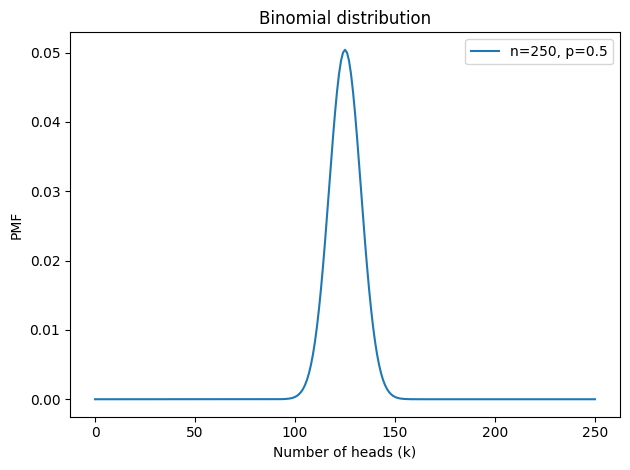

In [17]:
pmf_k.plot(label='n=250, p=0.5')
decorate(xlabel='Number of heads (k)',ylabel='PMF',title='Binomial distribution')

In [18]:
pmf_k.max_prob(), pmf_k.max()

(np.int64(125), np.float64(0.050412213147309655))

In [19]:
pmf_k(140)

np.float64(0.008357181724918188)

In [22]:
pmf_k.prob_ge(140) + pmf_k.prob_le(110)

np.float64(0.06642115124004333)

In [27]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
likelihood_heads = hypos
likelihood_tails = 1 - hypos
likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails
}
def update_euro(pmf, dataset):
    for data in dataset:
        pmf *= likelihood[data]
    pmf.normalize()

dataset = 'H' * 140 + 'T' * 110

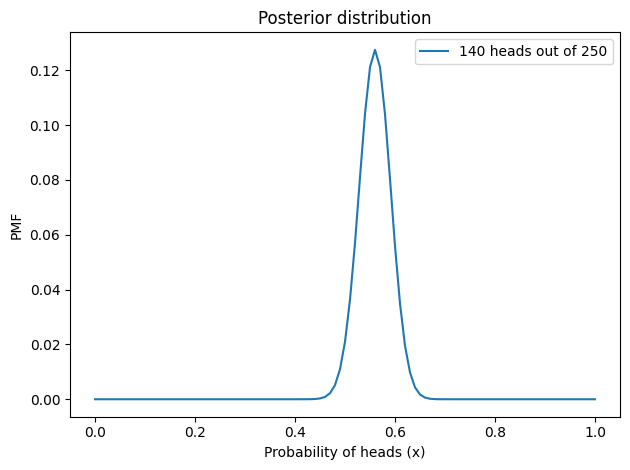

In [29]:
posterior = prior.copy()
update_euro(posterior, dataset)
posterior.plot(label='140 heads out of 250')
decorate(xlabel='Probability of heads (x)',ylabel='PMF',title='Posterior distribution')

In [30]:
posterior.max_prob(), posterior.max()

(np.float64(0.56), np.float64(0.12745318058391109))

In [44]:
def update_binom(pmf, data):
    k,n = data
    qs = pmf.qs
    likelihood = binom.pmf(k, n, qs)
    pmf *= likelihood
    pmf.normalize()

<Axes: >

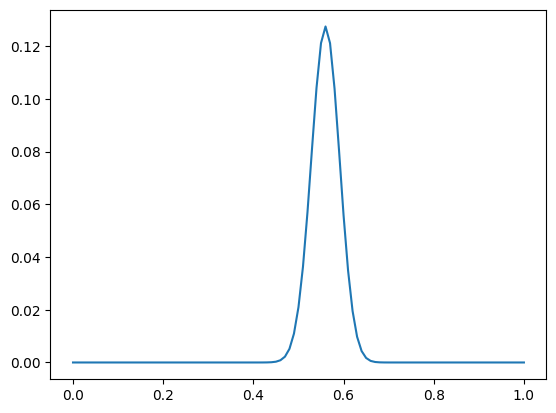

In [45]:
data = 140, 250
posterior2 = prior.copy()
update_binom(posterior2, data)
posterior2.plot(label='140 heads out of 250')

<Axes: >

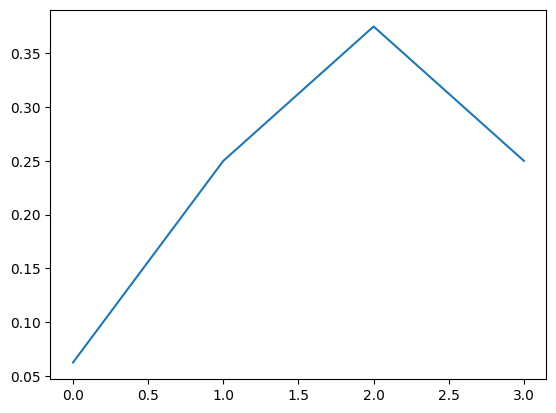

In [49]:
ks = np.arange(4)
ps = binom.pmf(ks, 4, 0.5)
pmf_k = Pmf(ps, ks)
pmf_k.plot()

## Exercise 4-1. 

In Major League Baseball (MLB), most players have a batting average between .200 and .330, which means that their probability of getting a hit is between 0.2 and 0.33. Suppose a player appearing in their first game gets 3 hits out of 3 attempts. What is the posterior distribution for their probability of getting a hit?

In [3]:
import numpy as np
from empiricaldist import Pmf
from scipy.stats import binom
from utils import decorate

<Axes: >

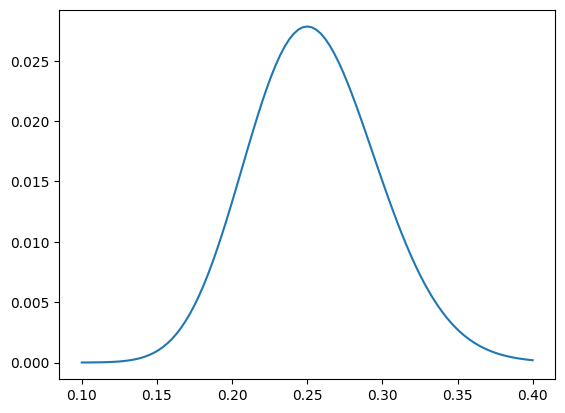

In [ ]:
hypos = np.linspace(0.1, 0.4, 101)
prior = Pmf(1, hypos)
likelihood = {
    'Y': hypos,
    'N': 1 - hypos
}
dataset = 'Y'*25 + 'N'*75
for data in dataset:
    prior *= likelihood[data]
prior.normalize()

prior.plot()

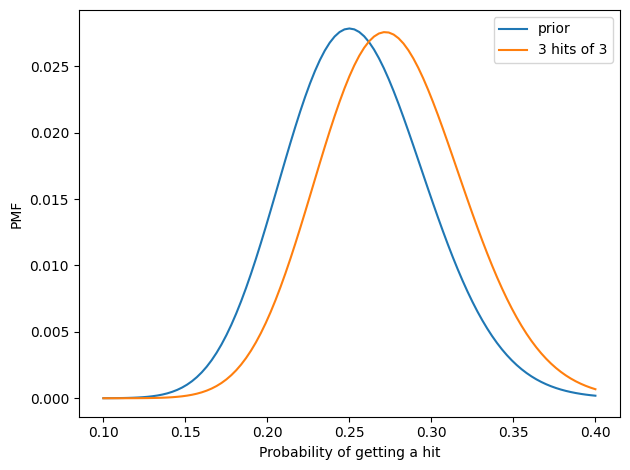

In [17]:
posterior = prior.copy()
dataset_new = 'Y'*3
for data in dataset_new:
    posterior *= likelihood[data]
posterior.normalize()

prior.plot(label='prior')
posterior.plot(label='3 hits of 3')
decorate(xlabel='Probability of getting a hit', ylabel='PMF')

In [20]:
prior.max_prob(), prior.max(), posterior.max_prob(), posterior.max()

(np.float64(0.25),
 np.float64(0.027838960633692254),
 np.float64(0.271),
 np.float64(0.027563807265634517))

### Exercise 4-2. 

Whenever you survey people about sensitive issues, you have to deal with social desirability bias, which is the tendency of people to adjust their answers to show themselves in the most positive light. One way to improve the accuracy of the results is randomized response. 

As an example, suppose you want to know how many people cheat on their taxes. If you ask them directly, it is likely that some of the cheaters will lie. You can get a more accurate estimate if you ask them indirectly, like this: Ask each person to flip a coin and, without revealing the outcome, 
- If they get heads, they report YES. 
- If they get tails, they honestly answer the question, “Do you cheat on your taxes?” 

If someone says YES, we don’t know whether they actually cheat on their taxes; they might have flipped heads. Knowing this, people might be more willing to answer honestly. 

Suppose you survey 100 people this way and get 80 YESes and 20 NOs. Based on this data, what is the posterior distribution for the fraction of people who cheat on their taxes? What is the most likely quantity in the posterior distribution?

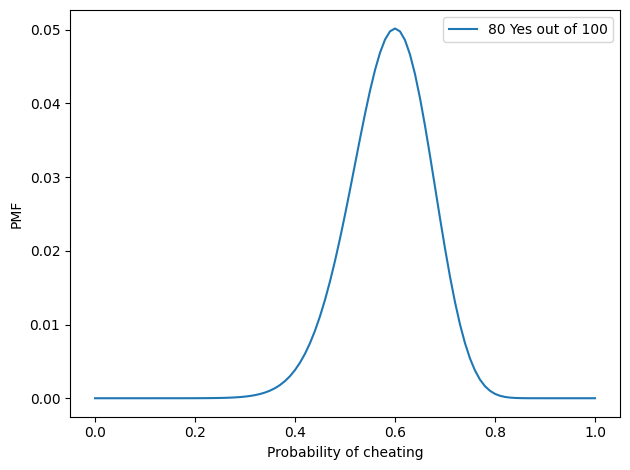

In [5]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
# if number of cheaters is x, the probablity of 'Yes' is 0.5 + x/2, 
# the probability of 'No' is 0.5 - x/2
likelihood = {
    'Y': 0.5 + hypos/2,
    'N': 0.5 - hypos/2
}

dataset = 'Y'*80 + 'N'*20
posterior = prior.copy()
for data in dataset:
    posterior *= likelihood[data]
posterior.normalize()

posterior.plot(label='80 Yes out of 100')
decorate(xlabel='Probability of cheating', ylabel='PMF')


In [6]:
posterior.max_prob()

np.float64(0.6)

## Exercise 4-3. 

Suppose you want to test whether a coin is fair, but you don’t want to spin it hundreds of times. So you make a machine that spins the coin automatically and uses computer vision to determine the outcome. 

However, you discover that the machine is not always accurate. Specifically, suppose the probability is y=0.2 that an actual heads is reported as tails, or actual tails reported as heads. 

If we spin a coin 250 times and the machine reports 140 heads, what is the posterior distribution of x? What happens as you vary the value of y?

In [18]:
def update_unreliable(pmf, dataset, y):
    hypos = pmf.qs
    likelihood = {
        'H': hypos * (1-y) + (1-hypos) * y,
        'T': (1 - hypos) * (1-y) + hypos * y
    }
    for data in dataset:
        pmf *= likelihood[data]
    pmf.normalize()

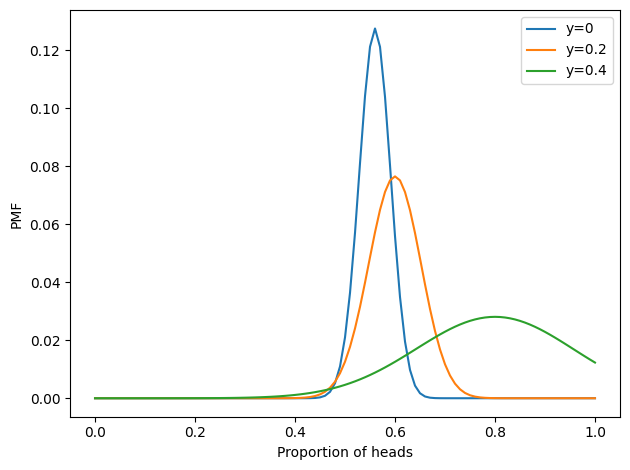

In [20]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
posterior0 = prior.copy()
dataset = 'H'*140 + 'T'*110
update_unreliable(posterior0, dataset, 0)
posterior_02 = prior.copy()
update_unreliable(posterior_02, dataset, 0.2)
postreior_04 = prior.copy()
update_unreliable(postreior_04, dataset, 0.4)
posterior0.plot(label='y=0')
posterior_02.plot(label='y=0.2')
postreior_04.plot(label='y=0.4')
decorate(xlabel='Proportion of heads', ylabel='PMF')

In [21]:
posterior0.max_prob(), posterior_02.max_prob(), postreior_04.max_prob()

(np.float64(0.56), np.float64(0.6), np.float64(0.8))

## Exercise 4-4. 

In preparation for an alien invasion, the Earth Defense League (EDL) has been working on new missiles to shoot down space invaders. Of course, some missile designs are better than others; let’s assume that each design has some probability of hitting an alien ship, x. 

Based on previous tests, the distribution of x in the population of designs is approxi‐ mately uniform between 0.1 and 0.4. 

Now suppose the new ultra-secret Alien Blaster 9000 is being tested. In a press con‐ ference, an EDL general reports that the new design has been tested twice, taking two shots during each test. The results of the test are confidential, so the general won’t say how many targets were hit, but they report: “The same number of targets were hit in the two tests, so we have reason to think this new design is consistent.” 

Is this data good or bad? That is, does it increase or decrease your estimate of x for the Alien Blaster 9000?

If the probability of hit eaching target is $x$, the probability of hitting one target in both targets is $ [2x(1-x)]^2 $ 

In [43]:
hypos = np.linspace(0.1, 0.4, 101)
prior = Pmf(1, hypos)

In [44]:
# specific version for n=2 shots per test
x = hypos
likes = [(1-x)**4, (2*x*(1-x))**2, x**4]
likelihood = np.sum(likes, axis=0)

In [45]:
# A more general version for any n shots per test
from scipy.stats import binom
n = 2
likes2 = [binom.pmf(k, n, x)**2 for k in range(n+1)]
likelihood2 = np.sum(likes2, axis=0)

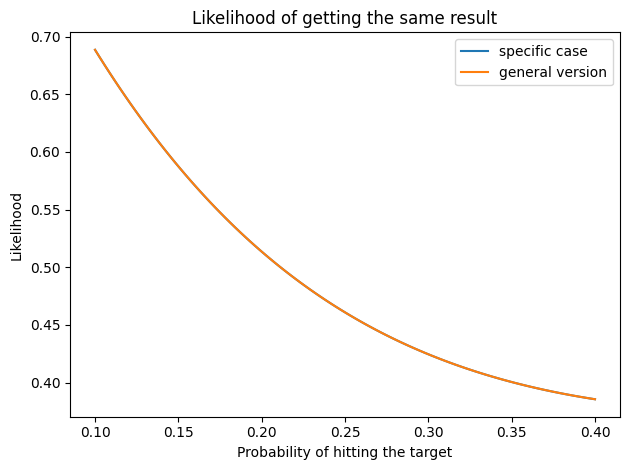

In [46]:
import matplotlib.pyplot as plt
plt.plot(x, likelihood, label='specific case')
plt.plot(x, likelihood2, label='general version')
decorate(xlabel='Probability of hitting the target', 
         ylabel='Likelihood', 
         title='Likelihood of getting the same result')

In [48]:
posterior = prior * likelihood
posterior.normalize()

np.float64(49.129627998379995)

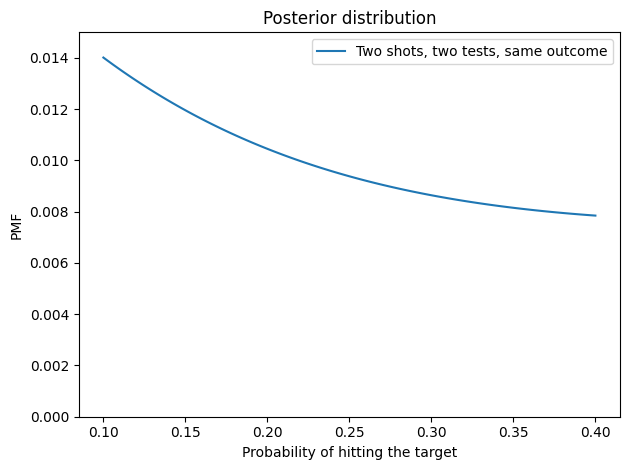

In [50]:
posterior.plot(label='Two shots, two tests, same outcome')
decorate(xlabel='Probability of hitting the target', 
         ylabel='PMF',
         title='Posterior distribution',
         ylim=[0, 0.015]
        )